In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_table("/content/Restaurant_Reviews.tsv")
df1

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df=df1.replace(to_replace=[1, 0],
           value=["positive","Negative"])


In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,positive
1,Crust is not good.,Negative
2,Not tasty and the texture was just nasty.,Negative
3,Stopped by during the late May bank holiday of...,positive
4,The selection on the menu was great and so wer...,positive
...,...,...
995,I think food should have flavor and texture an...,Negative
996,Appetite instantly gone.,Negative
997,Overall I was not impressed and would not go b...,Negative
998,"The whole experience was underwhelming, and I ...",Negative


In [ ]:
df['Liked'].value_counts()

positive    500
Negative    500
Name: Liked, dtype: int64

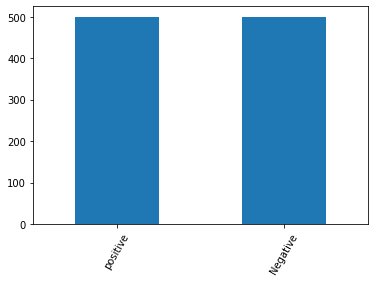

In [ ]:
import matplotlib.pyplot as plt
df['Liked'].value_counts().plot(kind='bar')
plt.xticks(rotation=60)
plt.show()


In [ ]:
x=df['Review'].values
y=df['Liked'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model1=SVC()

In [ ]:
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred1=model1.predict(x_test_vect)

In [ ]:
y_pred1

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'Negative', 'positive', 'Negative', 'Negative',
       'positive', 'Negative', 'positive', 'positive', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negati

In [ ]:
y_test

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'positive', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'positive', 'positive', 'Negative', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'Negative', 'positive', 'positive', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'positive', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.72

In [ ]:
data=["Wow... Loved this place."]
data=vect.transform(data)

In [ ]:
model1.predict(data)


array(['positive'], dtype=object)

In [ ]:
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array(['Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'positive', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'positive', 'positive', 'Negative', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'Negative',
       'positive', 'Negative', 'positive', 'Negative', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'Negative', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'Negative', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.792

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3=model3.predict(x_test_vect)
y_pred3

array(['positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'positive', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'positive',
       'Negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'Negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'positive', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'positive', 'Negative', 'Negative', 'Negative',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'Negative', 'Negative', 'positive', 'positive', 'Negative',
       'Negative', 'positive', 'Negative', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negati

In [ ]:
y_test

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'positive', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'positive', 'positive', 'Negative', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'Negative', 'positive', 'positive', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'positive', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.744

In [ ]:
data=["Crust is not good."]
data=vect.transform(data)

In [ ]:
model3.predict(data)

array(['positive'], dtype='<U8')

In [ ]:
from sklearn.pipeline import make_pipeline
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4

array(['positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'positive', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'Negative', 'positive',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'Negative', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'Negative', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.784

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(stop_words="english")
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model5=SVC()

In [ ]:
model5.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred5=model5.predict(x_test_vect)
y_pred5

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'positive', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'positive',
       'Negative', 'Negative', 'positive', 'Negative', 'Negative',
       'positive', 'Negative', 'positive', 'positive', 'positive',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'Negative',
       'Negative', 'positive', 'Negative', 'Negative', 'Negative',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred5)

0.74

In [ ]:
from sklearn.pipeline import  make_pipeline
model6=make_pipeline(TfidfVectorizer(),SVC())
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)
y_pred6

array(['Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'positive', 'Negative', 'Negative', 'positive',
       'positive', 'positive', 'Negative', 'positive', 'positive',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'positive', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'positive', 'Negative',
       'positive', 'Negative', 'Negative', 'Negative', 'positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'positive', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'positive', 'Negative',
       'Negative', 'Negative', 'positive', 'Negative', 'positive',
       'positive', 'Negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'Negative', 'positive', 'Negative',
       'positive', 'positive', 'positive', 'Negative', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred6)

0.82

In [ ]:
import joblib
joblib.dump(model6,'Positive or Negative')



['Positive or Negative']

In [ ]:
reloaded_model=joblib.load('Positive or Negative')
reloaded_model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
reloaded_model.predict(["Crust is not good."])


array(['Negative'], dtype=object)

In [ ]:
!pip install streamlit --quiet

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
st.title("SENTIMENT ANALYSIS")
reloaded_model=joblib.load('Positive or Negative')
input1=st.text_input("Enter the message: ")
output1=reloaded_model.predict([input1])
if st.button("PREDICT"):
   st.title(output1)

Overwriting app.py


In [ ]:
!streamlit run app.py  & npx localtunnel --port 8501

2022-08-10 17:08:35.414 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 4.564s
your url is: https://young-experts-yell-35-245-78-83.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.78.83:8501

  Stopping...
^C


In [ ]:
#About sentiment analysis and twitter sentiments:

#1. Sentiment analysis is a technique to analyze a piece of text to determine the sentiment behind it.
#2. It combines machine learning and natural language processing (NLP) to achieve this.
#3. Using basic Sentiment analysis, a program can understand whether the sentiment behind a piece of text is positive, negative, or neutral.
#4. It is a powerful technique in Artificial intelligence.
#5. In Modelling We can use Machine learning algorithms like Navie bayes(),SVC(),Logistic regression().